# Problem Statement:
Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic
Regression.


In [33]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [66]:
df=pd.read_csv('h1n1_vaccine_prediction.csv')

In [67]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [68]:
df.shape

(26707, 34)

In [69]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [71]:
# we cannot make use of unique_id for predicting the target variable, droping it will be wise 
df.drop(columns = 'unique_id', axis = 1, inplace= True)

In [46]:
for col in df.columns:
    print(col, df[col].dtype, df[col].isnull().sum(), sep='\t')

h1n1_worry	float64	92
h1n1_awareness	float64	116
antiviral_medication	float64	71
contact_avoidance	float64	208
bought_face_mask	float64	19
wash_hands_frequently	float64	42
avoid_large_gatherings	float64	87
reduced_outside_home_cont	float64	82
avoid_touch_face	float64	128
dr_recc_h1n1_vacc	float64	2160
dr_recc_seasonal_vacc	float64	2160
chronic_medic_condition	float64	971
cont_child_undr_6_mnths	float64	820
is_health_worker	float64	804
has_health_insur	float64	12274
is_h1n1_vacc_effective	float64	391
is_h1n1_risky	float64	388
sick_from_h1n1_vacc	float64	395
is_seas_vacc_effective	float64	462
is_seas_risky	float64	514
sick_from_seas_vacc	float64	537
age_bracket	object	0
qualification	object	1407
race	object	0
sex	object	0
income_level	object	4423
marital_status	object	1408
housing_status	object	2042
employment	object	1463
census_msa	object	0
no_of_adults	float64	249
no_of_children	float64	249
h1n1_vaccine	int64	0


### There are many missing values present in the dataset
### We can replace all with mode because all the features are categorical 

In [9]:
#df_numerical = df.select_dtypes(exclude = 'object')
#df.shape

In [10]:
#df_object = df.select_dtypes(include = 'object')
#df.shape

In [72]:
for col in df.columns:
    print(df[col].mode()[0])

2.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
4.0
2.0
2.0
4.0
2.0
1.0
65+ Years
College Graduate
White
Female
<= $75,000, Above Poverty
Married
Own
Employed
MSA, Not Principle  City
1.0
0.0
0


In [73]:
for col in df.columns:
    df[col].replace(np.nan, df[col].mode()[0], inplace=True)
    

In [146]:
mode = df.filter(df.columns).mode()
mode

,h1n1_worry,h1n1_awareness,bought_face_mask,wash_hands_frequently,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,...,sex_Female,income_level_Above Poverty,marital_status_Married,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,housing_status_Own
0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,0,0,0,0,0,1


In [74]:
for col in df.columns:
    print(col, df[col].dtype, df[col].isnull().sum(), sep='\t')

h1n1_worry	float64	0
h1n1_awareness	float64	0
antiviral_medication	float64	0
contact_avoidance	float64	0
bought_face_mask	float64	0
wash_hands_frequently	float64	0
avoid_large_gatherings	float64	0
reduced_outside_home_cont	float64	0
avoid_touch_face	float64	0
dr_recc_h1n1_vacc	float64	0
dr_recc_seasonal_vacc	float64	0
chronic_medic_condition	float64	0
cont_child_undr_6_mnths	float64	0
is_health_worker	float64	0
has_health_insur	float64	0
is_h1n1_vacc_effective	float64	0
is_h1n1_risky	float64	0
sick_from_h1n1_vacc	float64	0
is_seas_vacc_effective	float64	0
is_seas_risky	float64	0
sick_from_seas_vacc	float64	0
age_bracket	object	0
qualification	object	0
race	object	0
sex	object	0
income_level	object	0
marital_status	object	0
housing_status	object	0
employment	object	0
census_msa	object	0
no_of_adults	float64	0
no_of_children	float64	0
h1n1_vaccine	int64	0


<AxesSubplot:xlabel='age_bracket', ylabel='count'>

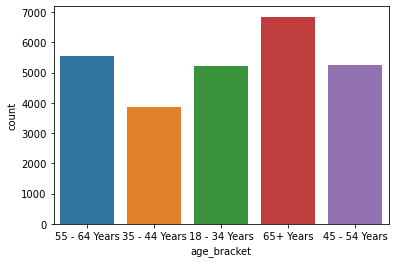

In [13]:
sns.countplot(x=df.age_bracket)

In [87]:
df_object = df.select_dtypes(include ='object')
df_object.shape

(26707, 9)

#### In a specific feature, we can group the values to make the model efficient

In [76]:
df.income_level.replace(['<= $75,000, Above Poverty','> $75,000'], 'Above Poverty', inplace = True)
df.income_level.head()

0    Below Poverty
1    Below Poverty
2    Above Poverty
3    Below Poverty
4    Above Poverty
Name: income_level, dtype: object

In [77]:
df.age_bracket.replace(['35 - 44 Years','18 - 34 Years'], 'Below 45', inplace=True)
df.age_bracket.replace(['45 - 54 Years','55 - 64 Years'], 'Below 65', inplace=True)
df.age_bracket.replace('65+ Years', 'Above 65', inplace=True)
df.age_bracket.value_counts()



Below 65    10801
Below 45     9063
Above 65     6843
Name: age_bracket, dtype: int64

<AxesSubplot:xlabel='qualification', ylabel='count'>

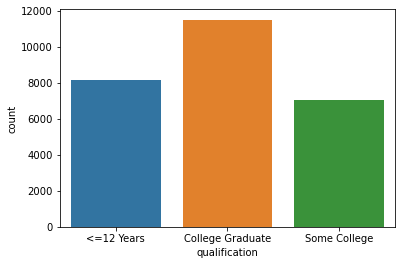

In [80]:
sns.countplot(x = df.qualification)

In [81]:
df.qualification.value_counts()

College Graduate    11504
<=12 Years           8160
Some College         7043
Name: qualification, dtype: int64

In [79]:
df.qualification.replace(['< 12 Years', '12 Years'], '<=12 Years', inplace= True)

In [83]:
df.race.value_counts()

White                21222
Other or Multiple     3367
Black                 2118
Name: race, dtype: int64

In [82]:
df.race.replace('Hispanic', 'Other or Multiple', inplace= True)

In [31]:
df.census_msa.value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [84]:
df.no_of_adults.value_counts()

1.0    14723
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64

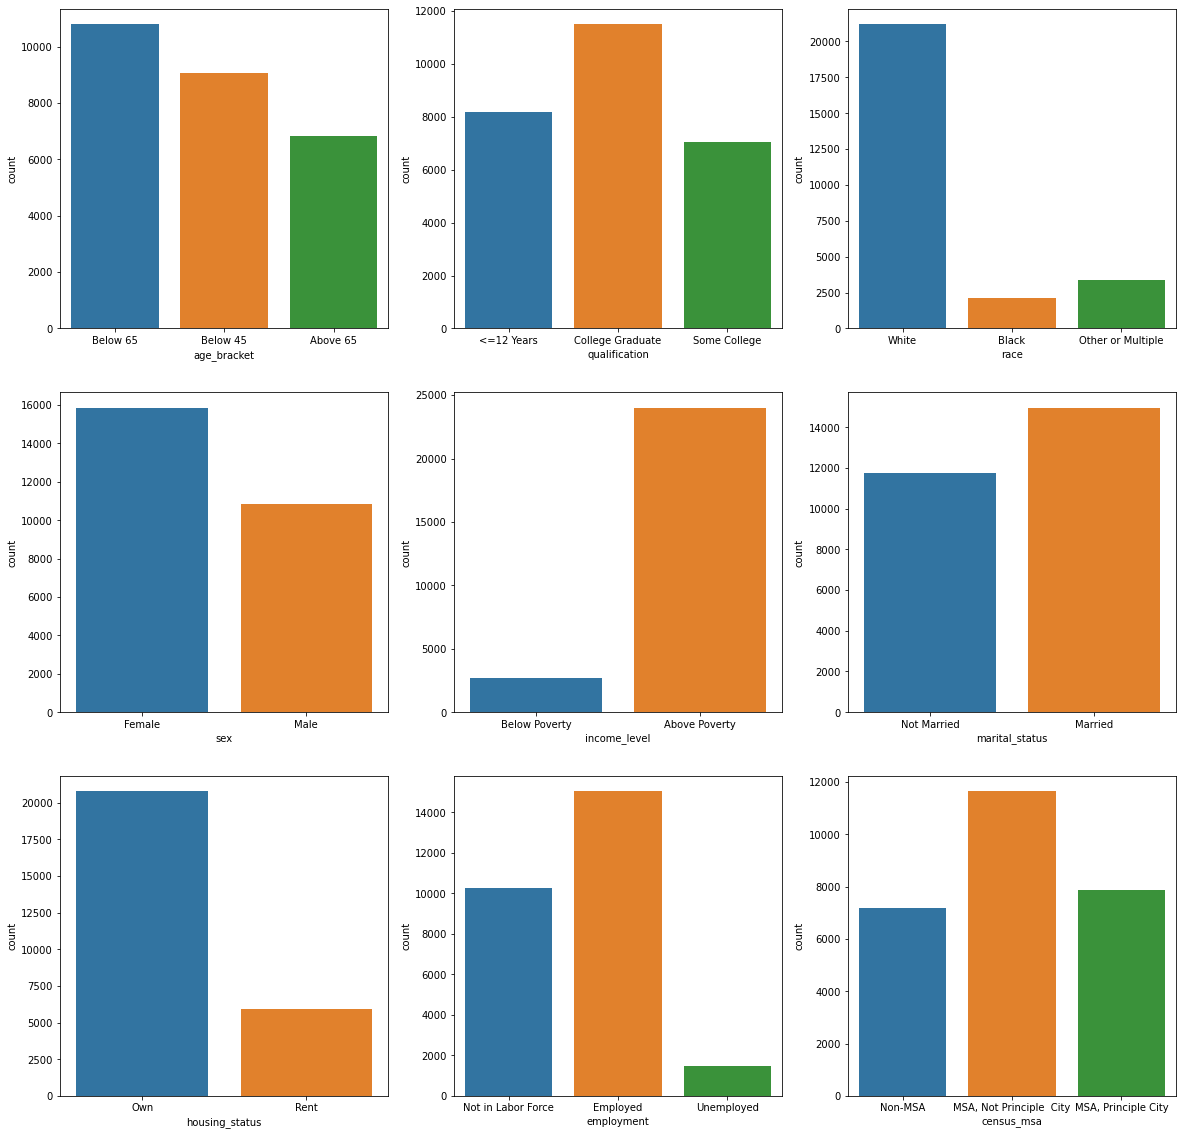

In [89]:
### Count Plot for all the object datatype features
c=1
plt.figure(figsize=(20,20))
for i in range(len(df_object.columns)):
    plt.subplot(3,3,c)
    sns.countplot(x = df_object.columns[i], data = df_object)
    c=c+1
   

In [85]:
df.corr()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
h1n1_worry,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,0.136957,...,0.024724,0.235841,0.372716,0.355637,0.231649,0.327986,0.220568,-0.016079,0.049441,0.121574
h1n1_awareness,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,0.094135,...,0.092251,0.119010,0.074394,-0.017038,0.085281,0.081156,-0.050857,0.023866,0.053378,0.117771
antiviral_medication,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.050882,...,-0.051810,0.030172,0.102553,0.076930,0.014498,0.081503,0.078618,0.044829,0.083090,0.040226
contact_avoidance,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.065589,...,0.025377,0.109066,0.116259,0.129983,0.117356,0.127991,0.084346,0.017995,0.038977,0.046837
bought_face_mask,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.079887,...,-0.027177,0.037679,0.128316,0.104655,0.040889,0.105917,0.084084,0.014191,0.004794,0.070413
wash_hands_frequently,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.086392,...,0.032339,0.134815,0.167414,0.148739,0.136936,0.170655,0.087218,0.009367,0.047451,0.074570
avoid_large_gatherings,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.077143,...,-0.028658,0.052432,0.125076,0.183517,0.078208,0.130800,0.131414,-0.030994,-0.009126,0.018089
reduced_outside_home_cont,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.067136,...,-0.031898,0.050866,0.123348,0.171669,0.066861,0.117428,0.133080,-0.026542,-0.008937,0.022080
avoid_touch_face,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.087201,...,0.010219,0.101776,0.144442,0.130461,0.104530,0.141537,0.089156,-0.001233,0.023739,0.070855
dr_recc_h1n1_vacc,0.136957,0.094135,0.050882,0.065589,0.079887,0.086392,0.077143,0.067136,0.087201,1.000000,...,0.025901,0.150546,0.247630,0.106671,0.103365,0.193956,0.057559,0.009081,0.029398,0.394086


All these features have less .05 / -.05 correlation with the dependent variable h1n1_vaccine. 
So removing them would improve the score of the model

antiviral_medication
contact_avoidance
avoid_large_gatherings
reduced_outside_home_cont
has_health_insur
sick_from_seas_vacc
no_of_adults
no_of_children


In [112]:
df.drop(columns=['antiviral_medication','contact_avoidance','avoid_large_gatherings','reduced_outside_home_cont','has_health_insur','sick_from_seas_vacc','no_of_adults','no_of_children'], axis = 1, inplace= True)

<AxesSubplot:>

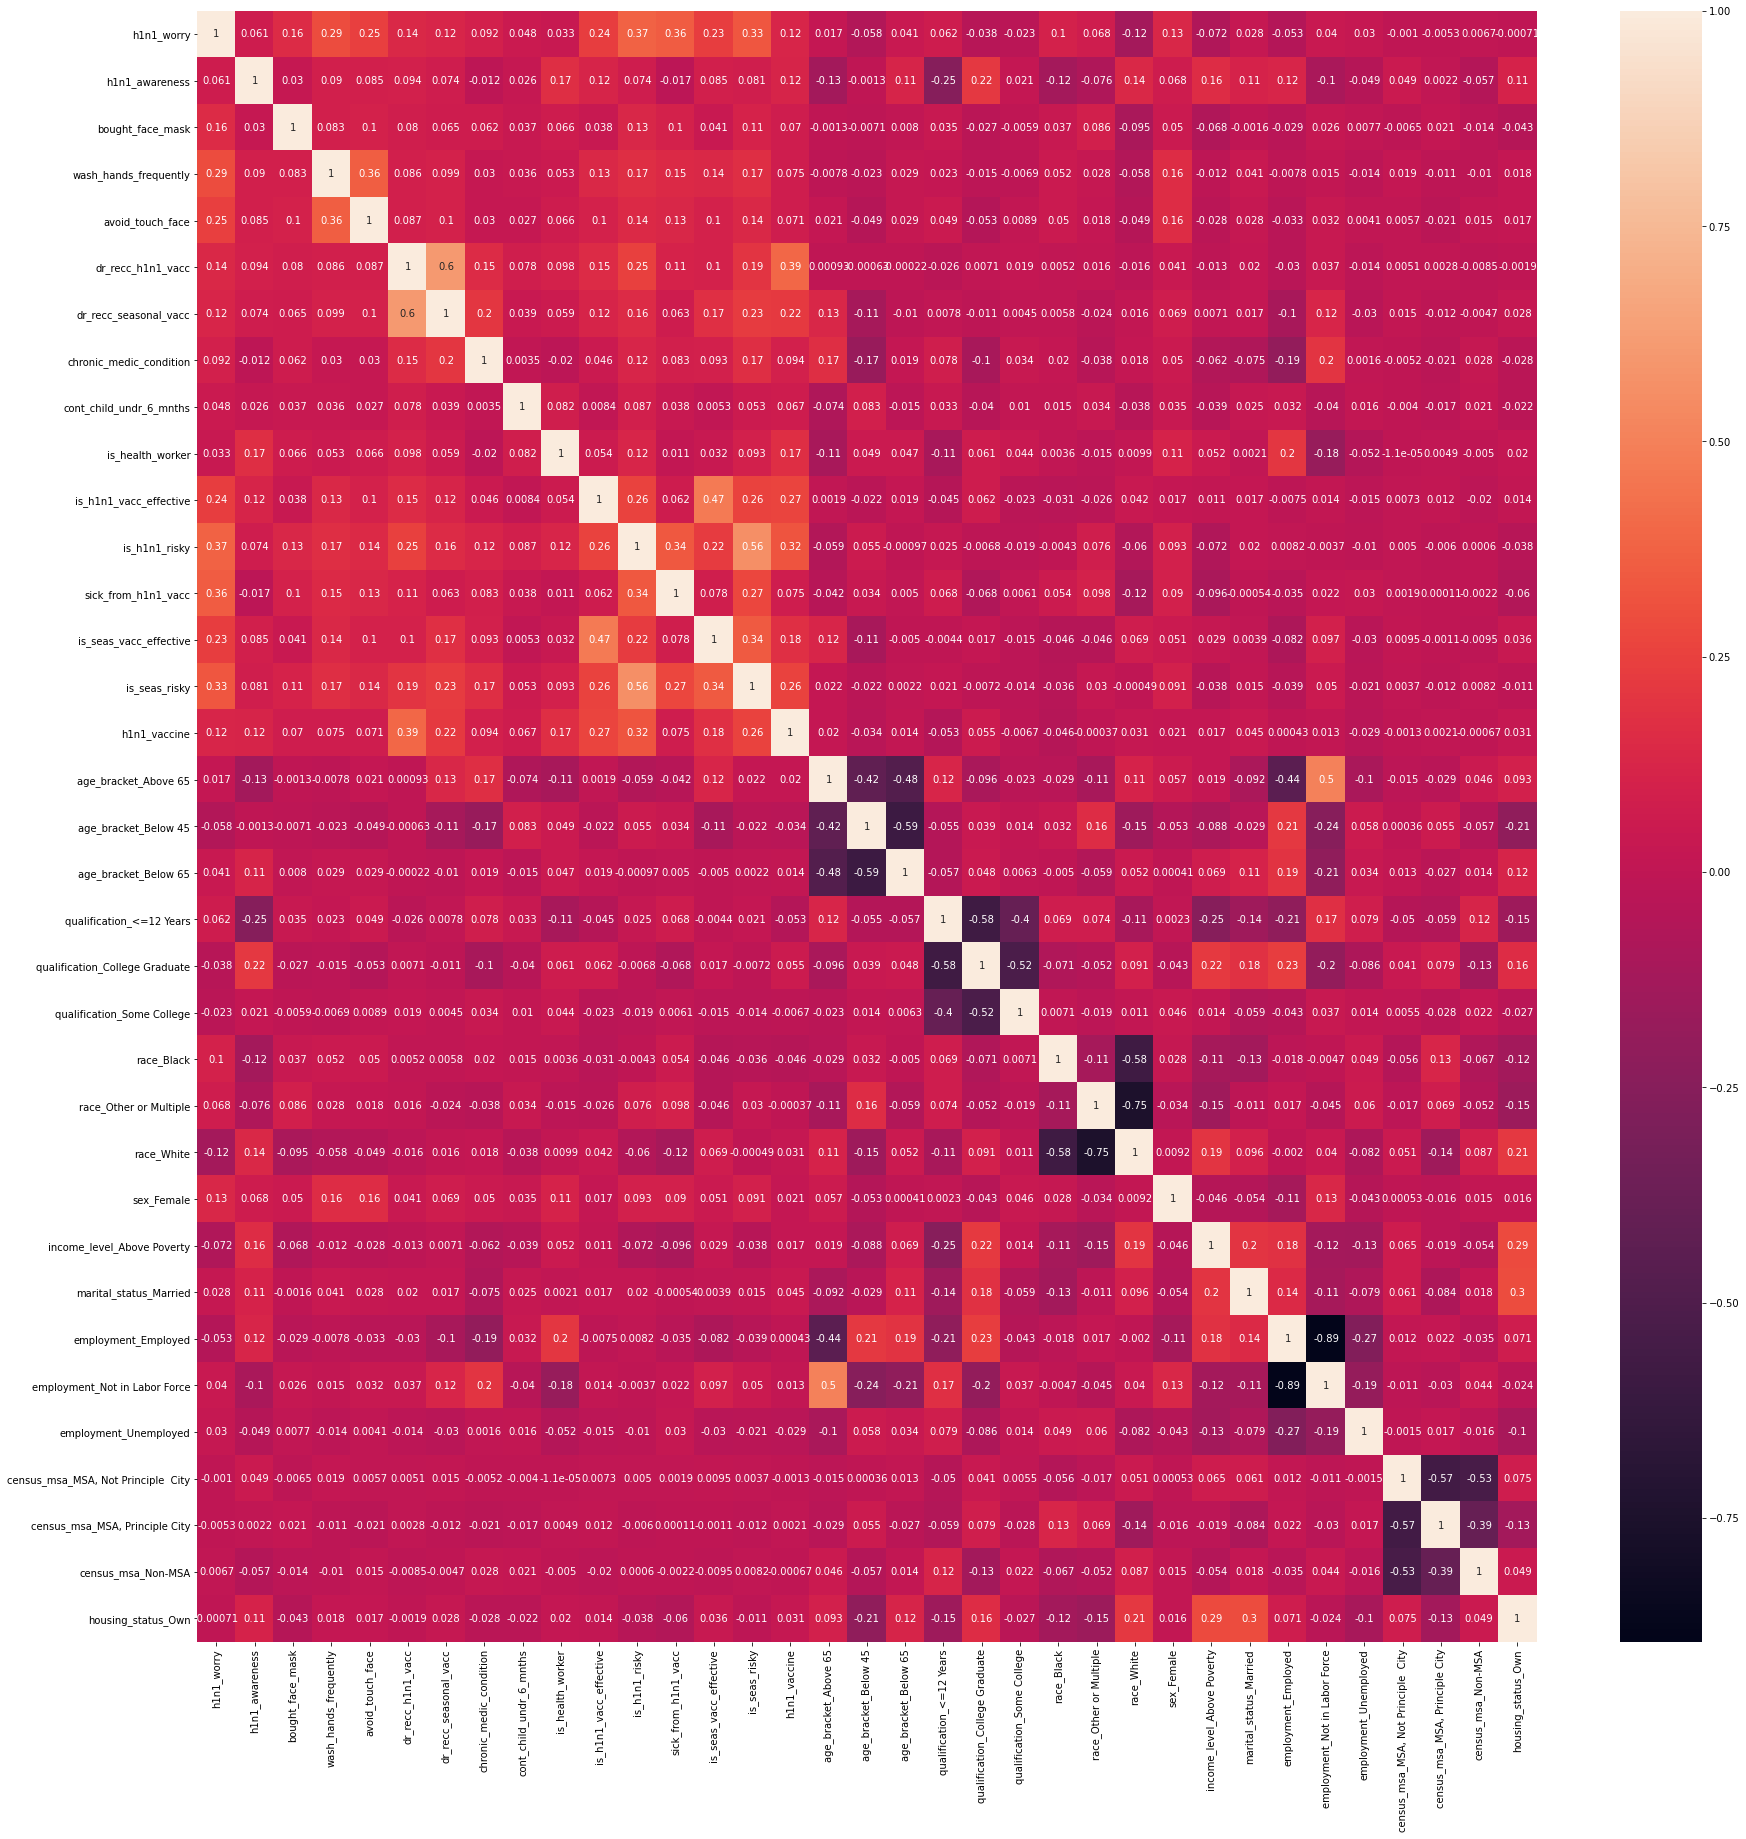

In [120]:
# Visualization correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [121]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'bought_face_mask',
       'wash_hands_frequently', 'avoid_touch_face', 'dr_recc_h1n1_vacc',
       'dr_recc_seasonal_vacc', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'h1n1_vaccine', 'age_bracket_Above 65',
       'age_bracket_Below 45', 'age_bracket_Below 65',
       'qualification_<=12 Years', 'qualification_College Graduate',
       'qualification_Some College', 'race_Black', 'race_Other or Multiple',
       'race_White', 'sex_Female', 'income_level_Above Poverty',
       'marital_status_Married', 'employment_Employed',
       'employment_Not in Labor Force', 'employment_Unemployed',
       'census_msa_MSA, Not Principle  City', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA', 'housing_status_Own'],
      dtype='object')

In [95]:
df_object.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [96]:
df = pd.get_dummies(df, columns=['age_bracket','qualification','race','sex','income_level','marital_status','employment','census_msa'])


In [97]:
df = pd.get_dummies(df, columns=['housing_status'])

In [102]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket_Above 65',
       'age_bracket_Below 45', 'age_bracket_Below 65',
       'qualification_<=12 Years', 'qualification_College Graduate',
       'qualification_Some College', 'race_Black', 'race_Other or Multiple',
       'race_White', 'sex_Female', 'sex_Male', 'income_level_Above Poverty',
       'income_level_Below Poverty', 'marital_status_Married',
       'marital_status_Not Married', 'employment_Empl

In [ ]:
df.drop(columns = ['housing_status_Rent', 'marital_status_Not Married', 'sex_Male', 'income_level_Below Poverty'], axis = 1, inplace = True )

## Model

In [133]:
# defining x and y
x=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [134]:
# spliting the data into train and test
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0)

In [135]:
# fitting the model
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
predictions=model.predict(x_test)

In [137]:
# after removing the less correlated columns , accuracy has improved by more than 1 percent. 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8318981654810932

In [109]:
from sklearn import metrics

In [119]:
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6279
           1       0.68      0.42      0.52      1734

    accuracy                           0.83      8013
   macro avg       0.77      0.68      0.71      8013
weighted avg       0.82      0.83      0.82      8013



In [140]:
# Standardization
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
#Fitting Logistic Regression to the training set  

model= LogisticRegression()  
model.fit(x_train, y_train)  
predictions = model.predict(x_test)
accuracy_score(y_test,predictions)



0.831648571072008

In [141]:
#MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df.drop(['h1n1_vaccine'], axis = 1)
x = scaler.fit_transform(x)
y = df.h1n1_vaccine
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
model= LogisticRegression()  
model.fit(x_train, y_train)  
predictions = model.predict(x_test)
accuracy_score(y_test,predictions)


0.8317733682765506

In [ ]:
#### We have found that neither the MinMax Scaling nor the Standardization have improved the score.